# 01. Prepare Problem

With the world moving online, Online Fraud is now a days a common problem and as a Security agency, your company has asked your help to provide insights on Fraud Detection while a transaction is in progress.

Now in transaction, you dont get is very frequently when whenever it occur there is huge financial loss with it. Prepare a model that is able to detect a fraud if it is in progress

## Question : 

Our goal is to build a model with an existing data of credit card that is able to detect fraud cases

> ### Load Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('D:\\data')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pally as pal

> ### Load Data

In [4]:
data = pd.read_csv('creditcard.csv')

# 02. Exploratory Data Analysis

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

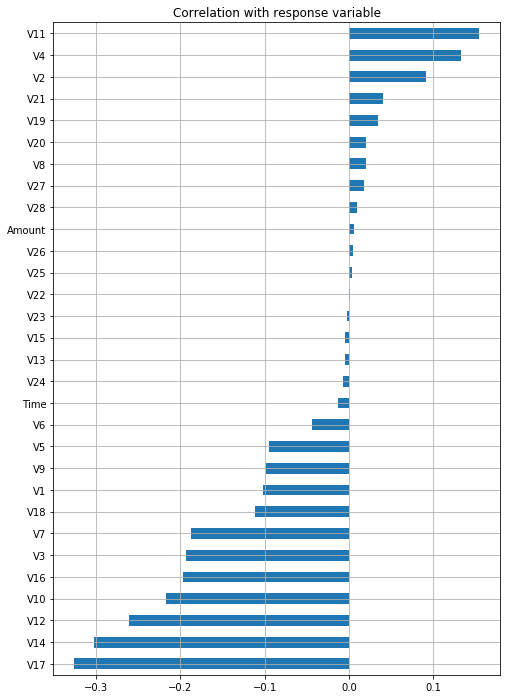

In [19]:
data.drop(columns='Class').corrwith(data.Class).sort_values().plot.barh(figsize=(8,12),
                                                                        title='Correlation with response variable',grid=True)

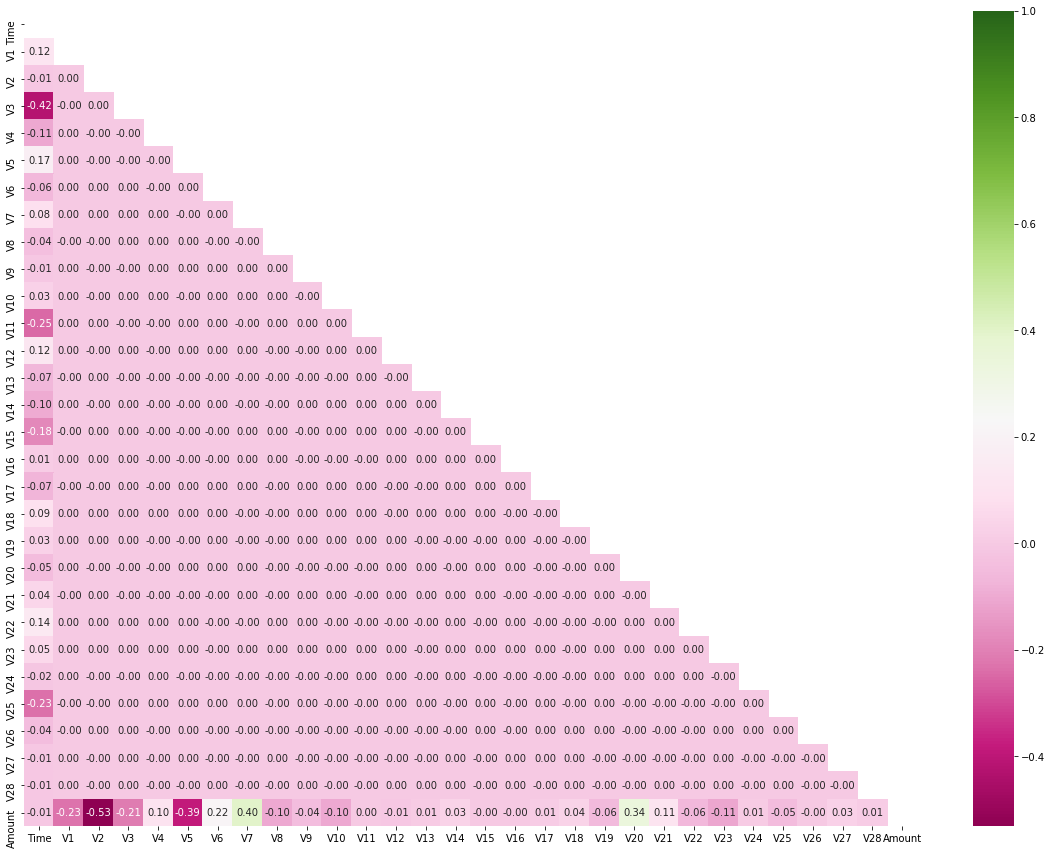

In [27]:
corr = data.drop(columns='Class').corr()

plt.rcParams['figure.figsize']=(20,15)
sns.heatmap(corr,mask=np.triu(np.ones_like(corr)),cmap='PiYG',annot=True,fmt='.2f')
plt.show()

# 03. Prepare Data

> ### Outlier Handling

 1 . Time  ( Correlation : -0.0123 )


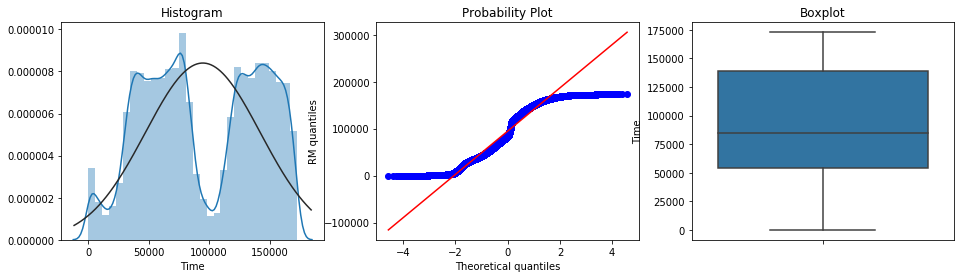

 2 . V1  ( Correlation : -0.1013 )


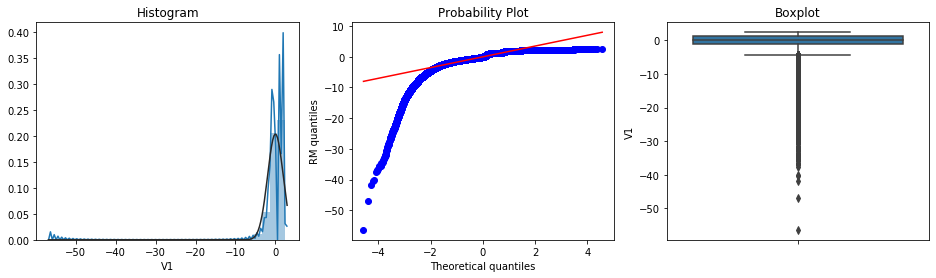

 3 . V2  ( Correlation : 0.0913 )


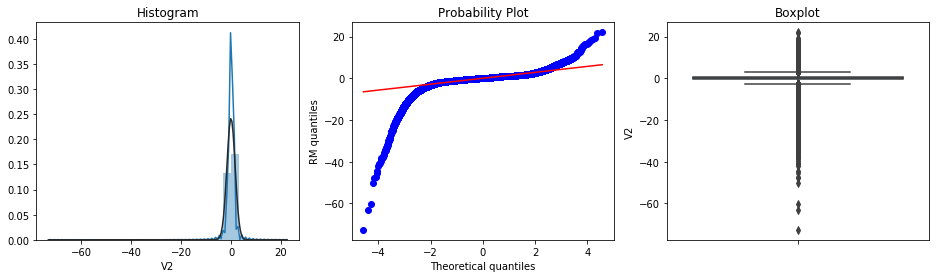

 4 . V3  ( Correlation : -0.193 )


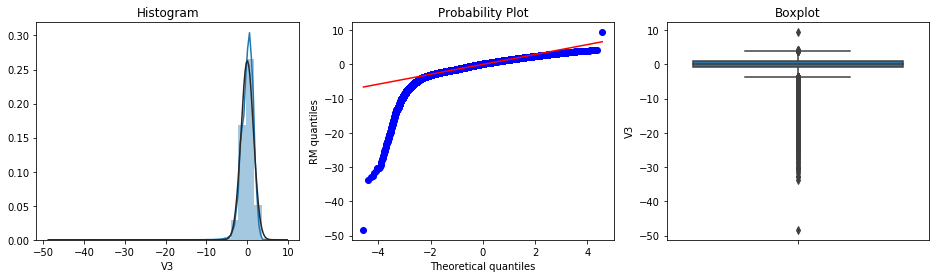

 5 . V4  ( Correlation : 0.1334 )


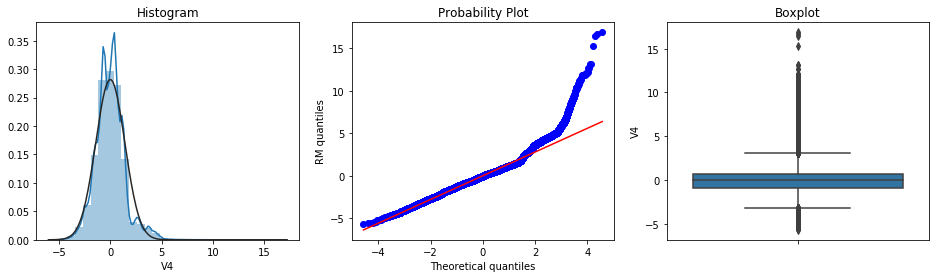

 6 . V5  ( Correlation : -0.095 )


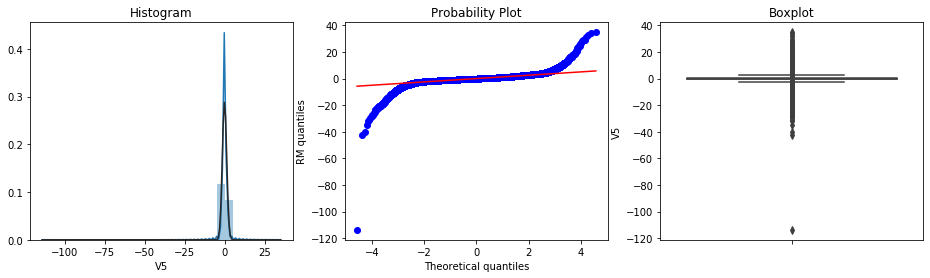

 7 . V6  ( Correlation : -0.0436 )


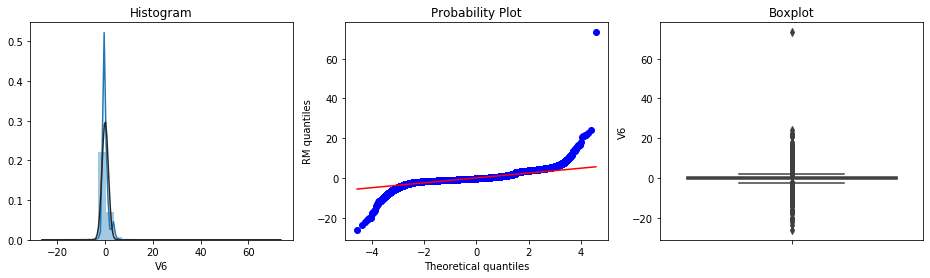

 8 . V7  ( Correlation : -0.1873 )


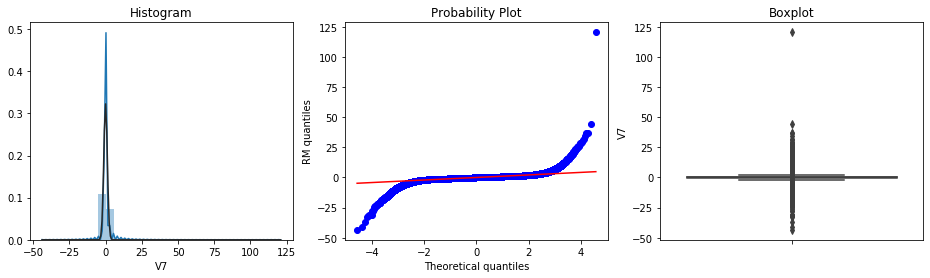

 9 . V8  ( Correlation : 0.0199 )


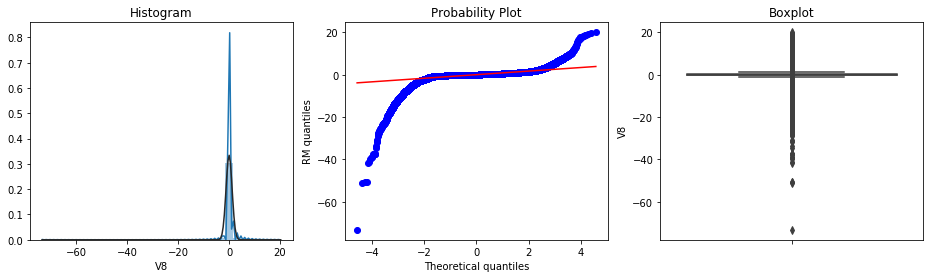

 10 . V9  ( Correlation : -0.0977 )


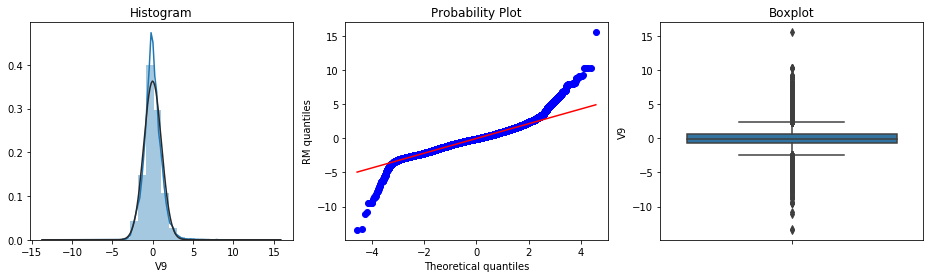

 11 . V10  ( Correlation : -0.2169 )


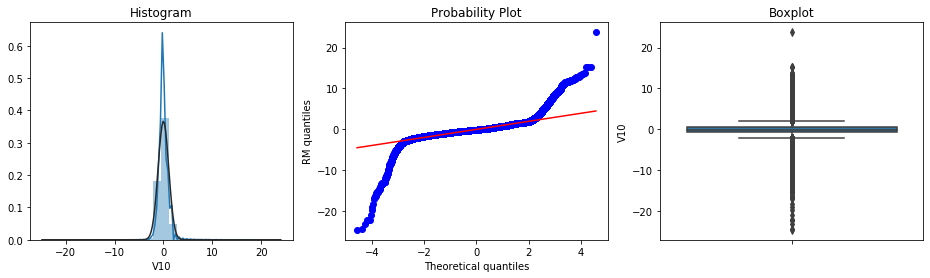

 12 . V11  ( Correlation : 0.1549 )


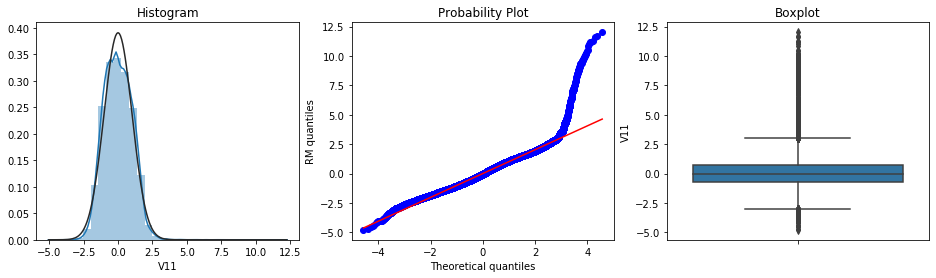

 13 . V12  ( Correlation : -0.2606 )


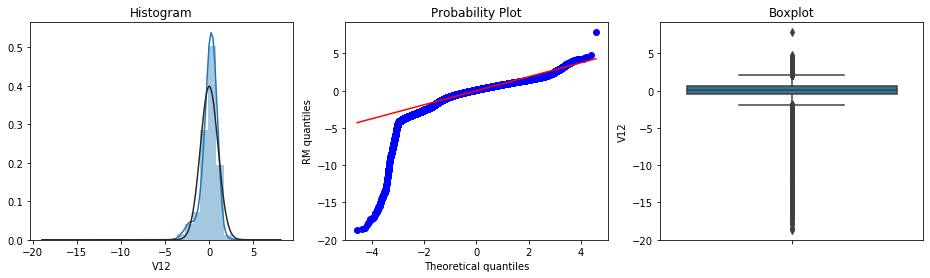

 14 . V13  ( Correlation : -0.0046 )


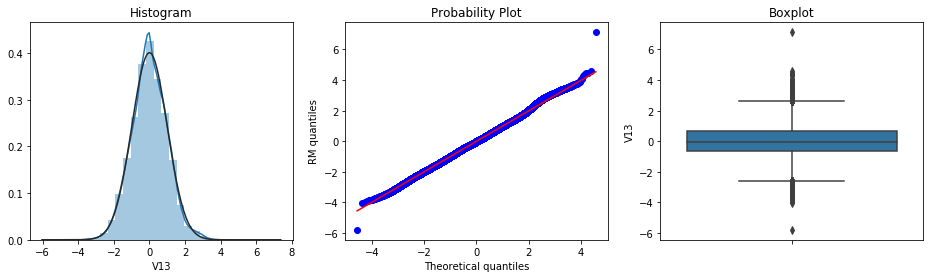

 15 . V14  ( Correlation : -0.3025 )


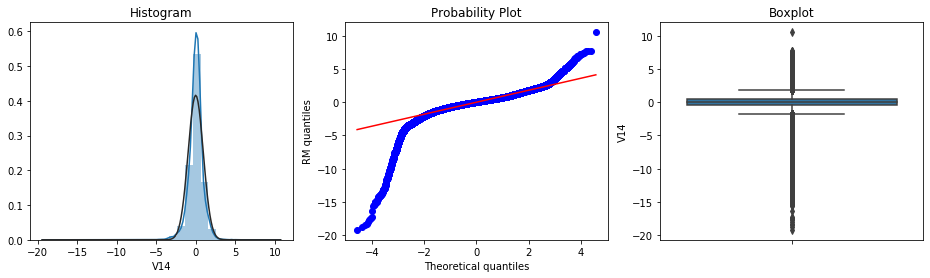

 16 . V15  ( Correlation : -0.0042 )


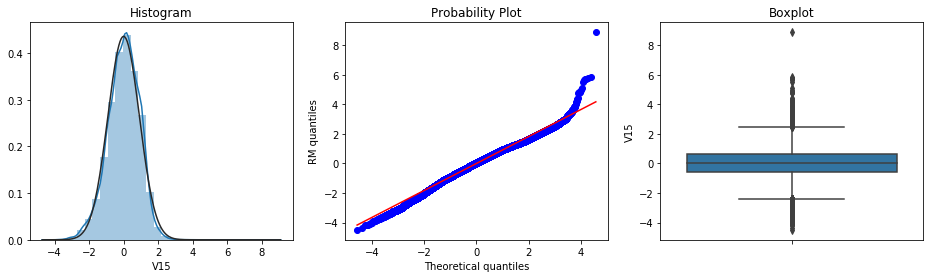

 17 . V16  ( Correlation : -0.1965 )


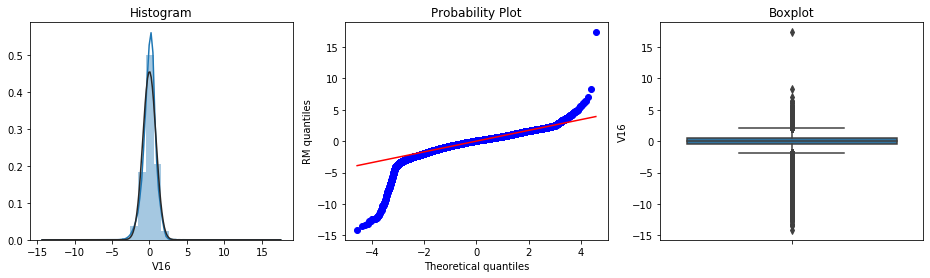

 18 . V17  ( Correlation : -0.3265 )


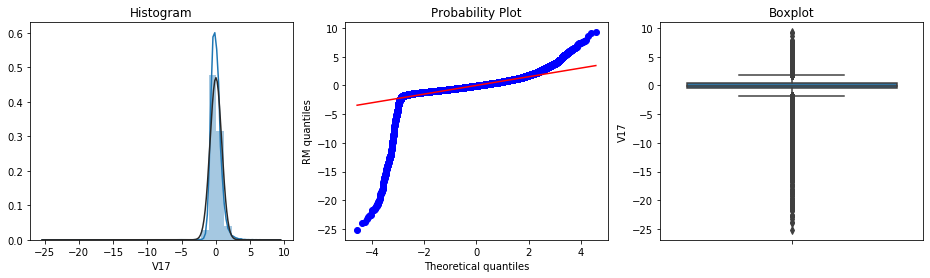

 19 . V18  ( Correlation : -0.1115 )


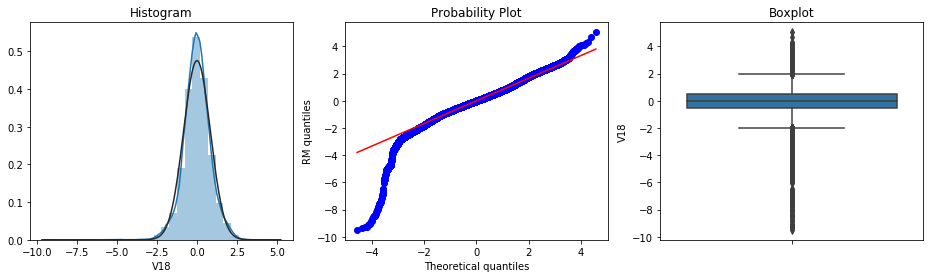

 20 . V19  ( Correlation : 0.0348 )


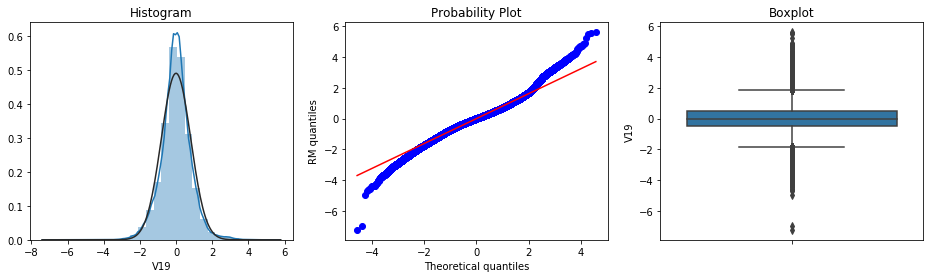

 21 . V20  ( Correlation : 0.0201 )


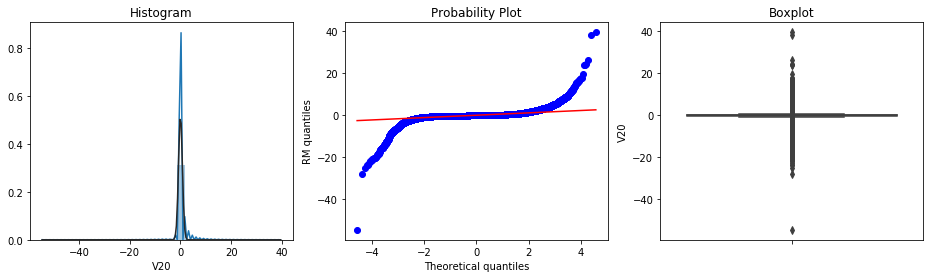

 22 . V21  ( Correlation : 0.0404 )


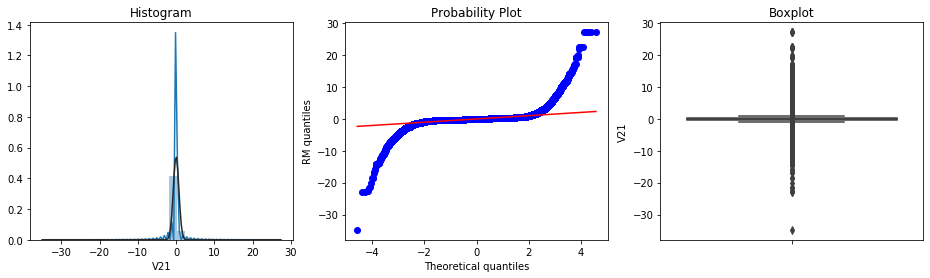

 23 . V22  ( Correlation : 0.0008 )


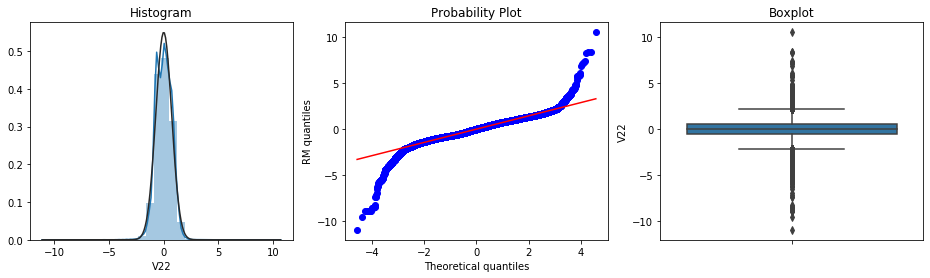

 24 . V23  ( Correlation : -0.0027 )


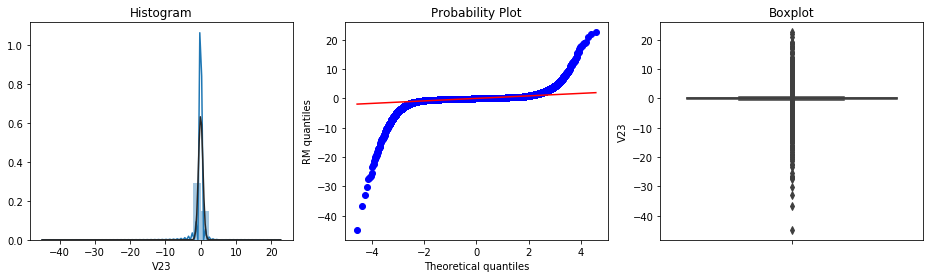

 25 . V24  ( Correlation : -0.0072 )


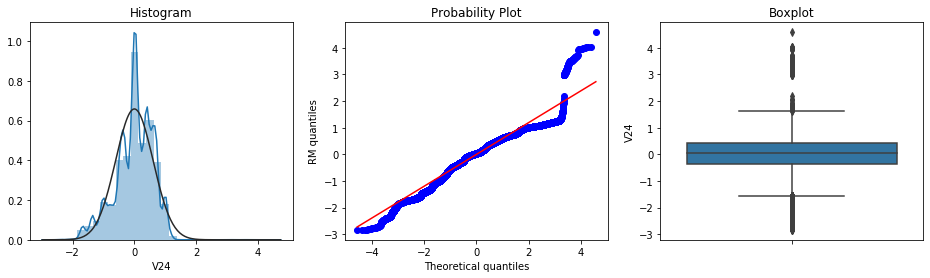

 26 . V25  ( Correlation : 0.0033 )


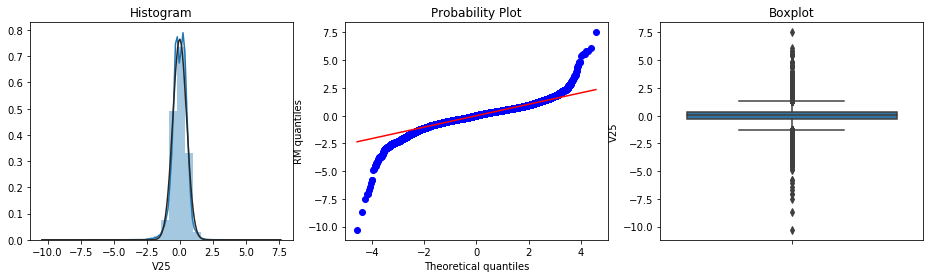

 27 . V26  ( Correlation : 0.0045 )


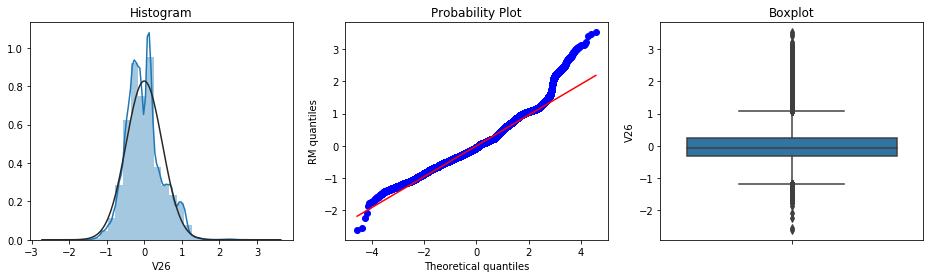

 28 . V27  ( Correlation : 0.0176 )


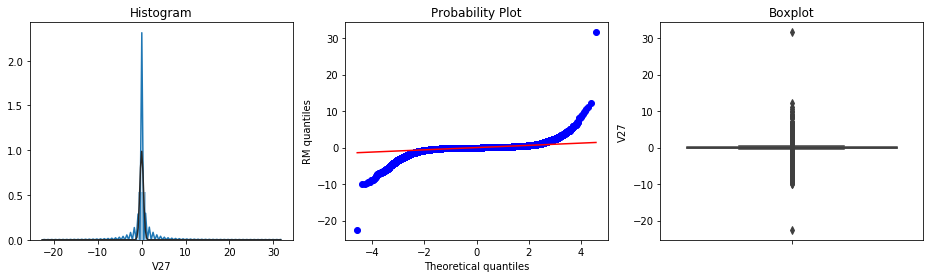

 29 . V28  ( Correlation : 0.0095 )


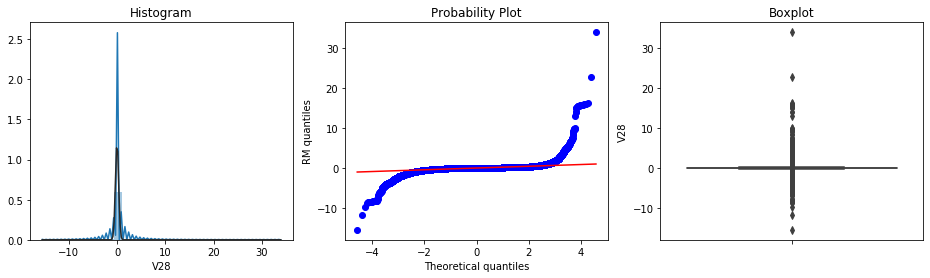

 30 . Amount  ( Correlation : 0.0056 )


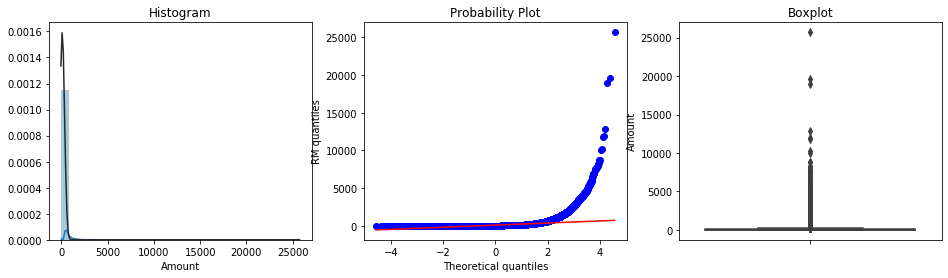

 31 . Class  ( Correlation : 1.0 )


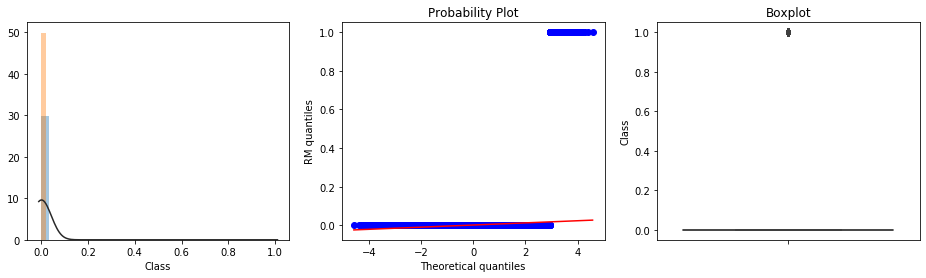

In [28]:
pal.display.NumericalDistribution(data,data.columns.tolist(),'Class')

> ### Variable Transformation

> ### Discreatization

> ### Scaling

> ### Feature Selection

> ### Data Discovery

# 04. Evaluate Algorithms

> ### Neural Networks

In [31]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [32]:
response = data.Class
data_nn = data.drop(columns=['Time','Class'])

In [33]:
data_nn.shape

(284807, 29)

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_nn,response,test_size=0.2,random_state=0)

In [39]:
x_train.shape

(227845, 29)

In [40]:
x_test.shape

(56962, 29)

In [181]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [182]:
nn_model = Sequential(
[    Dense(units = 16,input_dim = 29,activation='relu'),
    Dense(units = 24,activation='relu'),
    Dropout(0.5),
    Dense(units = 20,activation='relu'),
    Dense(units = 24,activation='relu'),
    Dense(1,activation='sigmoid')]
)

In [183]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_58 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_13 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_60 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [184]:
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [185]:
nn_model.fit(x_train,y_train,batch_size=500,epochs=5,validation_data=(x_test,y_test))

Train on 227845 samples, validate on 56962 samples
Epoch 1/5
227845/227845 [==============================] - 4s 18us/step - loss: 0.0384 - acc: 0.9966 - val_loss: 0.0139 - val_acc: 0.9982
Epoch 2/5
227845/227845 [==============================] - 2s 10us/step - loss: 0.0155 - acc: 0.9983 - val_loss: 0.0117 - val_acc: 0.9982
Epoch 3/5
227845/227845 [==============================] - 2s 11us/step - loss: 0.0118 - acc: 0.9983 - val_loss: 0.0081 - val_acc: 0.9991
Epoch 4/5
227845/227845 [==============================] - 2s 11us/step - loss: 0.0081 - acc: 0.9989 - val_loss: 0.0070 - val_acc: 0.9992
Epoch 5/5
227845/227845 [==============================] - 2s 11us/step - loss: 0.0065 - acc: 0.9991 - val_loss: 0.0051 - val_acc: 0.9993


In [186]:
ypred = nn_model.predict(x_test)

In [187]:
from sklearn.metrics import confusion_matrix,classification_report

In [188]:
ypred

array([[0.0000000e+00],
       [1.0907650e-05],
       [0.0000000e+00],
       ...,
       [0.0000000e+00],
       [1.5788704e-05],
       [0.0000000e+00]], dtype=float32)

In [189]:
print(classification_report(y_test,ypred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.84      0.72      0.78       101

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



we are able to just identify 72% of actual fraudulent transactions. This is good but it can be improved further

Text(33.0, 0.5, 'Actual')

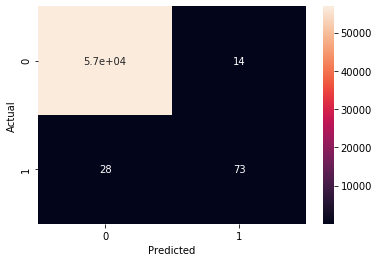

In [202]:
plt.rcParams['figure.figsize']=(6,4)
sns.heatmap(confusion_matrix(y_test,ypred.round(),labels=[0,1]),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Over Sampling data

In [208]:
from imblearn.over_sampling import SMOTE


In [219]:
x_resampled,y_resampled = SMOTE().fit_sample(x_train,y_train)

In [220]:
x_resampled.shape

(454908, 29)

In [222]:
y_resampled.shape

(454908,)

**Modelling on OverSampled Data**

In [223]:
nn_model = Sequential(
[    Dense(units = 16,input_dim = 29,activation='relu'),
    Dense(units = 24,activation='relu'),
    Dropout(0.5),
    Dense(units = 20,activation='relu'),
    Dense(units = 24,activation='relu'),
    Dense(1,activation='sigmoid')]
)

In [224]:
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [243]:
nn_model.fit(x_train,y_train,batch_size=1000,epochs=15,validation_data=(x_resampled,y_resampled))

Train on 227845 samples, validate on 454908 samples
Epoch 1/15
227845/227845 [==============================] - 2s 7us/step - loss: 0.0024 - acc: 0.9995 - val_loss: 0.4643 - val_acc: 0.8873
Epoch 2/15
227845/227845 [==============================] - 2s 7us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.3967 - val_acc: 0.9021
Epoch 3/15
227845/227845 [==============================] - 2s 7us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 0.3714 - val_acc: 0.9056
Epoch 4/15
227845/227845 [==============================] - 2s 7us/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.3746 - val_acc: 0.9059
Epoch 5/15
227845/227845 [==============================] - 2s 7us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.3665 - val_acc: 0.9135
Epoch 6/15
227845/227845 [==============================] - 2s 7us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.3789 - val_acc: 0.9137
Epoch 7/15
227845/227845 [==============================] - 2s 7us/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.3804 

In [244]:
ypred = nn_model.predict(x_test)

Text(33.0, 0.5, 'Actual')

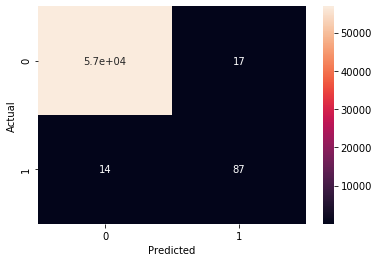

In [245]:
plt.rcParams['figure.figsize']=(6,4)
sns.heatmap(confusion_matrix(y_test,ypred.round(),labels=[0,1]),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 05. Finalize Model

In [246]:
nn_model = Sequential(
[    Dense(units = 16,input_dim = 29,activation='relu'),
    Dense(units = 24,activation='relu'),
    Dropout(0.5),
    Dense(units = 20,activation='relu'),
    Dense(units = 24,activation='relu'),
    Dense(1,activation='sigmoid')]
)

In [247]:
nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_resampled,y_resampled = SMOTE().fit_sample(x_train,y_train)

In [ ]:
nn_model.fit(x_train,y_train,batch_size=1000,epochs=50,validation_data=(x_resampled,y_resampled))

In [ ]:
ypred = nn_model.predict(x_test)

Text(33.0, 0.5, 'Actual')

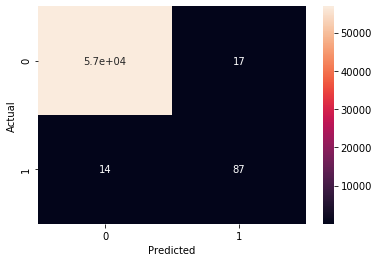

In [248]:
plt.rcParams['figure.figsize']=(6,4)
sns.heatmap(confusion_matrix(y_test,ypred.round(),labels=[0,1]),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')